### Reviewing Logging in Python

- Logging provides a extra set of eyes to watch the program flow while developing

- Get the state of the program before the error occurred

- Logging data can be used while scaling up

We will be using the Python's logging module for this purpose...

There are 5 standard levels of severity 

1 - DEBUG

2 - INFO

3 - WARNING

4 - ERROR

5 - CRITICAL

In [1]:
import logging

logging.debug("this is debug")
logging.info("this is info")
logging.warning("this is warning")
logging.error("this is error")
logging.critical("this is critical")

# Root is the default name of the logger

ERROR:root:this is error
CRITICAL:root:this is critical


#### Using basicConfig() to modify the logger


level: The root logger will be set for specified security level 

filename: This specifies the file for logs

filemode: The given filename is opened in this mode. Default is 'a'

format: This is the format of log message

In [2]:
# Creating the basic config for the logger using class. Need to restart the Kernel to work if earlier 
# cell is executed
import logging 

logging.basicConfig(level='debug', name='newLog', filename='logger.txt', format='%(name)s - %(levelname)s')

logging.info("this is info")
logging.warning("this is warning")
logging.error("this is error")
logging.critical("this is critical")

In [1]:
# Python locks the file that it is using to log

import logging

logging.basicConfig(filename='newlogger.txt', format="%(name)s - %(message)s")
logging.warning("This is warning")
logging.critical("This is critical")

In [3]:
# Adding more details in the logging like the date and time, processID, levelname
# attributes can be found at https://docs.python.org/3/library/logging.html#logrecord-attributes
# more details of basicConfig at https://docs.python.org/3/library/logging.html#logging.basicConfig

import logging 
logging.basicConfig(force=True, filename='newlog.log', format='%(name)s - %(asctime)s - %(levelno)s - %(message)s', datefmt="%d-%b %H-%M")
logging.warning("this is test warning")
logging.error("this is test error")
logging.critical("this is test critical")

In [5]:
# Capturing variables 

import logging
logging.basicConfig(force=True, level=10, format="%(message)s", filename='newlog.log', datefmt='%b-%d-%H-%S')
name = 'upwork'
logging.warning("warning given")
logging.debug(f"debuging {name}")
# just to add some practice
logging.info("%s awesome place to work", name)

In [11]:
# Capturing Stack Traces

import logging 
logging.basicConfig(filename='newlog.log',format='%(levelno)s - %(message)s', force=True)

a = 5
b = 0

try:
    k = a / b 
except Exception as e:
    logging.error("Exception raised. Not the stack trace is not shared") 

In [14]:
import logging
logging.basicConfig(filemode='w', force=True, format='%(levelname)s : %(message)s', filename='newlog.log')

f = 25
g = 'a'

try:
    i = f / g
except Exception as e:
    logging.error("Exception caught, along with the stack trace", exc_info=True)
    #  if you’re logging from an exception handler, use the logging.exception()
    logging.exception("This captures the stack trace below without exc_info")

The most commonly used classes defined in the logging module are the following:

Logger: This is the class whose objects will be used in the application code directly to call the functions.

LogRecord: Loggers automatically create LogRecord objects that have all the information related to the event being logged, like the name of the logger, the function, the line number, the message, and more.

Handler: Handlers send the LogRecord to the required output destination, like the console or a file. Handler is a base for subclasses like StreamHandler, FileHandler, SMTPHandler, HTTPHandler, and more. These subclasses send the logging outputs to corresponding destinations, like sys.stdout or a disk file.

Formatter: This is where you specify the format of the output by specifying a string format that lists out the attributes that the output should contain.

In [16]:
# Creating custom logger is done through getLogger method

logger = logging.getLogger('playLog')
# if the filename is configured in basicConfig, then below output goes there only. 
logger.error("Error by playLog")
# Configure the custom logger with formatters and handlers seperately

In [17]:
# Use module-level loggers by passing __name__ as the name parameter to getLogger() to create a logger object as the name of the logger itself would tell us from where the events are being logged. 

# __name__ is a special built-in variable in Python which evaluates to the name of the current module.

In [5]:
print(logging.DEBUG)
print(logging.INFO)
print(logging.WARNING)
print(logging.ERROR)
print(logging.CRITICAL)

10
20
30
40
50


In [4]:
# Handlers help send the log / error messages to the desired location ranging from stdout to mail via smtp. Or even multiple locations

# One logger can have different Handlers with different severity levels. 

# The workflow of creating handler, formatter and attaching it to logger is shown below

import logging 

logger1 = logging.getLogger("modLog")
logger1.setLevel(level=logging.DEBUG) # Set this to the lowest level, and w/o this the handlers will work only from warnings
# In order to be fully passed from a logger to handler and then logged to the end stream (which could be sys.stdout, a file, or an email via SMTP), a LogRecord must have a level at least as high as both the logger and handler.

# Creating handlers
handler1 = logging.StreamHandler()
handler2 = logging.FileHandler(filename='newlog.log', mode='w')

# Setting levels for handlers. Levels have to be numbers
handler1.setLevel(level='INFO') # Note the way level is provided in the setLevel method
# handler1.set_name('handler1')
handler2.setLevel(level='WARNING')

# Setting up formatting for the handlers
handler1_format = logging.Formatter('%(name)s - %(levelname)s - %(message)s - %(levelname)s') 

handler2_format = logging.Formatter('%(asctime)s - %(name)s - %(message)s - %(levelname)s', datefmt='%b-%Y')

# attaching the formatter to the handlers
handler1.setFormatter(handler1_format)
handler2.setFormatter(handler2_format)

# Add the handler to the logger
logger1.addHandler(handler1)
logger1.addHandler(handler2)

logger1.warning("This is on stream output")
logger1.error("This is on FileHandler output") # its output will still display in the stdout
logger1.info('testing info')

modLog - WARNING - This is on stream output - WARNING
modLog - ERROR - This is on FileHandler output - ERROR
modLog - INFO - testing info - INFO


In [8]:
# explore how logger works, along with its methods and attributes. Using print for documenting 

print(logger1.getEffectiveLevel())

print(logger1.level)


10
10


#### Python’s logging package can be complicated in certain spots. Handlers, loggers, levels, namespaces, filters:

logging levels and how they work

Thread-safety versus process-safety in logging

The design of logging from an OOP perspective

Logging in libraries vs applications

Best practices and design patterns for using logging

We will be referring to the code in [logging's __init__.py](https://github.com/python/cpython/blob/main/Lib/logging/__init__.py)

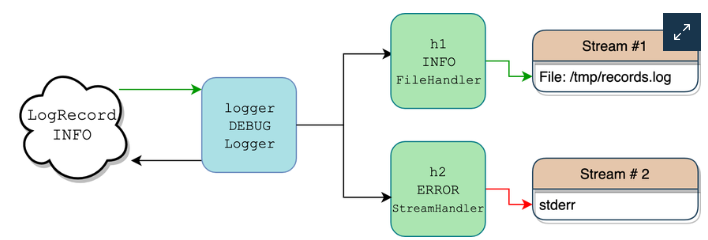

Handlers, writing the LogRecord to their stream is called emitting it, which is captured in their .emit().

A Logger, a Handler, and a LogRecord each have a .level associated with them.

A Logger instance sends a LogRecord instance to zero or more Handler instances.

The LogRecord contains some metadata, such as the following:

- A name

- The creation time as a Unix timestamp

- The message itself

- Information on what function made the logging call

In [9]:
applog = logging.getLogger('applog')

print(applog.level)  # will return 0 or NOSET

print(applog.getEffectiveLevel())

0
30


**Filter** and **Filterer** are designed to let you add additional function-based filters on top of the level-based filtering that is done by default. I like to think of it as **à la carte** filtering.

In [10]:
# Adding filter to the logger

import logging

fil = logging.getLogger('fil')
fil.setLevel(level=logging.DEBUG)
fil.addHandler(logging.StreamHandler())
fil.filters  # return empty []

[]

In [11]:
class ShortMsgFilter(logging.Filter):
    """Only allow messages that are longer. > 25 chars"""
    def filter(self, record):
        msg = record.msg
        if isinstance(msg, str):
            return len(msg) > 25
        return False

In [12]:
fil.addFilter(ShortMsgFilter())
fil.filters

In [13]:
fil.info('Verry llolllonnnggg messaggeeee....')
fil.info('crips mess')

Verry llolllonnnggg messaggeeee....


In [14]:
# all logger instances have root attribute
fil.root

<RootLogger root (WARNING)>

In [15]:
# and a manager attribute.  The .manager does all the facilitation of searching for existing loggers with the name "name" and creating them if they don’t exist.
fil.manager

In [16]:
# We can get the loggers to propagate to their parents and check for handlers
# The term propagate refers to how a logger keeps walking up its chain of parents looking for handlers. 
fil.propagate

True

In [17]:
# We can get the parent of the logger. 
fil.parent

<RootLogger root (WARNING)>

In [2]:
# practice logging and custom logger

import logging

# Creating some variables to log, and situation to catch

a = 57
f = '86'

logging.basicConfig(force=True, filemode='w', filename='newlog.log', level=logging.WARNING, format='%(message)s : %(levelname)s : %(name)s')

logging.info(f'Wont see the a: {a}')

try:
    x = a / f

except Exception as e:
    logging.exception("This is exception")
    logging.error('This is error by the error method')

In [3]:
# Practicing custom logger
import logging 

# step 1: create a new logger
mylog = logging.getLogger('mylog')

# new step : This step is important, if you want the handler to work
mylog.setLevel(logging.DEBUG)
# step 2: create a one handler 
handler = logging.StreamHandler()

# step 3: set level of the handler
handler.setLevel(logging.DEBUG)

# step 4: create a formatter
formater = logging.Formatter(fmt='%(name)s - %(message)s - %(levelname)s')

# step 5: attach formater to handler with setFormatter
handler.setFormatter(formater)

# step 6: add handler to new logger
mylog.addHandler(handler)

# step 7: Start logging
mylog.info("I believe this will have trouble... because the mylog level was not set")
mylog.warning("This will stream out as error")
mylog.error("This will stream out as error")
mylog.critical("Thats a critical flash")


mylog - I believe this will have trouble... because the mylog level was not set - INFO
mylog - I believe this will have trouble... because the mylog level was not set - INFO
mylog - I believe this will have trouble... because the mylog level was not set - INFO
mylog - This will stream out as error - WARNING
mylog - This will stream out as error - WARNING
mylog - This will stream out as error - WARNING
mylog - This will stream out as error - ERROR
mylog - This will stream out as error - ERROR
mylog - This will stream out as error - ERROR
mylog - Thats a critical flash - CRITICAL
mylog - Thats a critical flash - CRITICAL
mylog - Thats a critical flash - CRITICAL


Say that you want to design a multipronged logging setup: (Howcompetetive Repo/ projects / prac_log)

- Each module gets a logger with multiple handlers.

- Some of the handlers are shared between different logger instances in different modules. These handlers only care about level-based filtering, not the module where the log record emanated from. There is a handler for DEBUG messages, one for INFO, one for WARNING, and so on.

- Each logger is also tied to one more additional handler that only receives LogRecord instances from that lone logger. You can call this a module-based file handler.

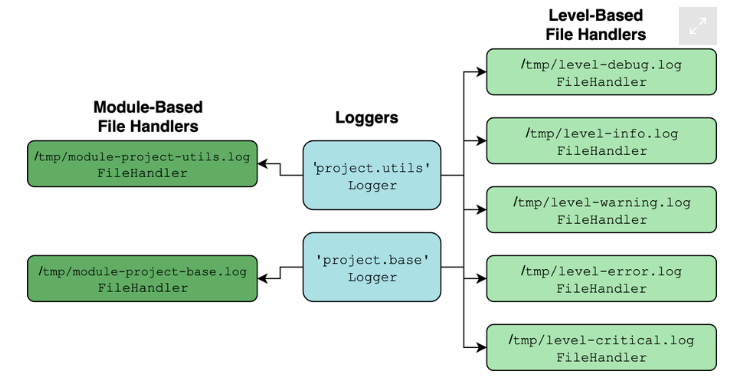


#### the steps to check the project
```
>>> from pprint import pprint
>>> import project
>>> from project import base, utils

>>> project.logger
<Logger project (DEBUG)>
>>> base.logger, utils.logger
(<Logger project.base (DEBUG)>, <Logger project.utils (DEBUG)>)
>>> base.logger.handlers
[<FileHandler /tmp/module-project-base.log (DEBUG)>]
>>> pprint(base.logger.parent.handlers)
[<FileHandler /tmp/level-debug.log (DEBUG)>,
 <FileHandler /tmp/level-info.log (INFO)>,
 <FileHandler /tmp/level-warning.log (WARNING)>,
 <FileHandler /tmp/level-error.log (ERROR)>,
 <FileHandler /tmp/level-critical.log (CRITICAL)>]
>>> base.func1()
>>> utils.func2()
```

You logged a message that seemingly went nowhere, and you’re not sure why.

Don’t forget that the effective level of a logger for which you don’t otherwise set a custom level is WARNING, because a logger will walk up its hierarchy until it finds the root logger with its own WARNING level:

Instead of being suppressed, a log message appeared in a place that you didn’t expect it to.

When you defined your logger above, you didn’t add any handlers to it. So, why is it writing to the console?

The reason for this is that logging sneakily uses a **handler called lastResort** that writes to sys.stderr if no other handlers are found

Repeated logging calls can degrade runtime performance slightly, but the logging package does its very best to control that and keep it in check. By not merging the format string with its arguments right away, logging is delaying the string formatting until the LogRecord is requested by a Handler.

The NullHandler is all about the distinctions between logging in a library versus an application. L

A library is an extensible, generalizable Python package that is intended for other users to install and set up. It is built by a developer with the express purpose of being distributed to users. Examples include popular open-source projects like NumPy, dateutil, and cryptography.

```
# Place this in your library's uppermost `__init__.py`
# Nothing else!

import logging

logging.getLogger(__name__).addHandler(NullHandler())
```

An application (or app, or program) is designed for a more specific purpose and a much smaller set of users (possibly just one user). It’s a program or set of programs highly tailored by the user to do a limited set of things. An example of an application is a Django app that sits behind a web page. Applications commonly use (import) libraries and the tools they contain.

Cleverly, if the logging package encounters an exception that has to do with logging itself, then it will print the traceback but not raise the exception itself.

In [21]:
import logging
b = 5
a = 5
logging.error("lets see b: %d", b, a)
logging.critical("The program continued")

--- Logging error ---
Traceback (most recent call last):
  File "d:\python_installs\Lib\logging\__init__.py", line 1110, in emit
    msg = self.format(record)
          ^^^^^^^^^^^^^^^^^^^
  File "d:\python_installs\Lib\logging\__init__.py", line 953, in format
    return fmt.format(record)
           ^^^^^^^^^^^^^^^^^^
  File "d:\python_installs\Lib\logging\__init__.py", line 687, in format
    record.message = record.getMessage()
                     ^^^^^^^^^^^^^^^^^^^
  File "d:\python_installs\Lib\logging\__init__.py", line 377, in getMessage
    msg = msg % self.args
          ~~~~^~~~~~~~~~~
TypeError: not all arguments converted during string formatting
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "d:\python_installs\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "d:\python_installs\Lib\site-packages\traitlets\config\application.py", line 1053, in 